In [1]:
import numpy as np
import pandas as pd

np.random.seed(23) 

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

df = pd.DataFrame(class1_sample,columns=['feature1','feature2','feature3'])
df['target'] = 1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

df1 = pd.DataFrame(class2_sample,columns=['feature1','feature2','feature3'])

df1['target'] = 0

df = pd.concat([df, df1], ignore_index=True)


df = df.sample(40)
     

In [2]:
df.head()

,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1


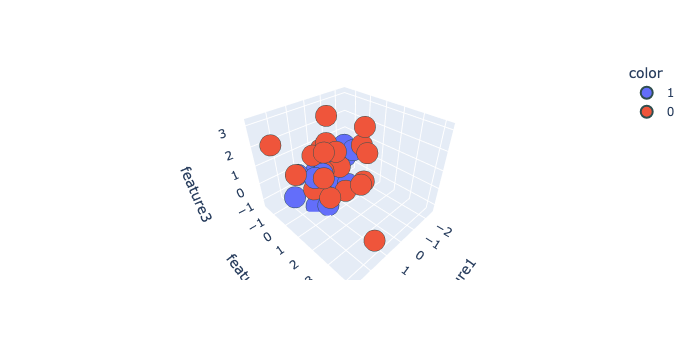

In [4]:
import plotly.express as px
#y_train_trf=y_train.astype(str)
fig=px.scatter_3d(df,x=df['feature1'],y=df['feature2'],z=df['feature3'],color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,line=dict(width=2,color='DarkSlateGrey')),selector=dict(mode='markers'))
fig.show()

In [5]:
#Step-1 Apply standard scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df.iloc[:,0:3]=scaler.fit_transform(df.iloc[:,0:3])

In [6]:
#Step-2 Find Covariance matrix
covariance_matrix=np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix:\n',covariance_matrix)

Covariance Matrix:
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [7]:
#Step-3 Finding EV and EVs
eigen_values,eigen_vectors=np.linalg.eig(covariance_matrix)

In [8]:
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [9]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

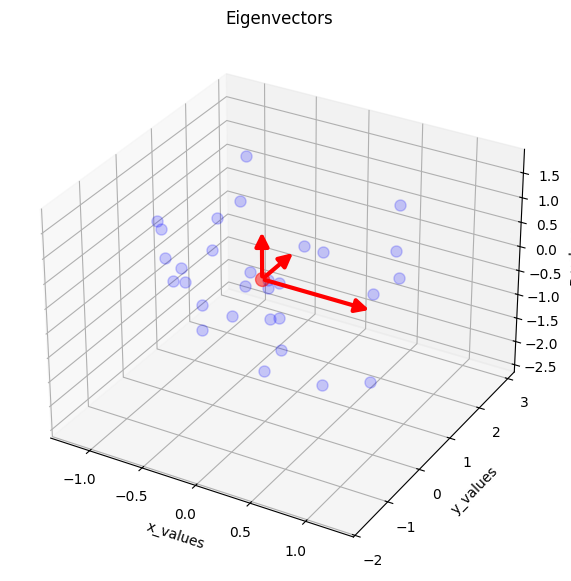

In [10]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, proj3d
from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        # ✅ Use ax.get_proj() instead of renderer.M
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.get_proj())
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        return np.mean(zs3d)

# Example 3D scatter + eigenvectors
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

# Example dataset
df = pd.DataFrame({
    'feature1': np.random.randn(30),
    'feature2': np.random.randn(30),
    'feature3': np.random.randn(30)
})
eigen_vectors = np.eye(3)  # for demonstration

ax.plot(df['feature1'], df['feature2'], df['feature3'], 'o', markersize=8, color='blue', alpha=0.2)
ax.plot([df['feature1'].mean()], [df['feature2'].mean()], [df['feature3'].mean()],
        'o', markersize=10, color='red', alpha=0.5)

# Draw eigenvectors as arrows
for v in eigen_vectors.T:
    a = Arrow3D(
        [df['feature1'].mean(), df['feature1'].mean() + v[0]],
        [df['feature2'].mean(), df['feature2'].mean() + v[1]],
        [df['feature3'].mean(), df['feature3'].mean() + v[2]],
        mutation_scale=20, lw=3, arrowstyle="-|>", color="r"
    )
    ax.add_artist(a)

ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')
plt.title('Eigenvectors')
plt.show()
